In [25]:
# Dependencies
import numpy as np
import datetime as dt
import sqlite3
import pandas as pd
import dataframe_image as dfi

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)
print(june_results)


SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [7]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()
print(june_results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date', 'June Temps'])
june_df

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [28]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

# Converting the june_df.describe() into a dataframe to be able ro explort it as PNG
june_describe_df = pd.DataFrame({'june_df': june_df['June Temps'].describe()})
june_describe_df.dfi.export('june_describe_df.png')
june_describe_df

,june_df
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## Skill Drill: Same procedure as before using only Pandas

In [10]:
# Connect to database
dat = sqlite3.connect('hawaii.sqlite')
# Extract all the rows from the database
query = dat.execute("SELECT * From Measurement")
cols = [column[0] for column in query.description]
# Convert dabase to Pandas DataFrame
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
# Add a column 'mm' with the month number for each date
results['mm'] = pd.to_datetime(results['date']).dt.month
# Filter DatFarme to only show rows where column 'mm' is equal to '6' (month of June)
rslt_df=results[results['mm']== 6]

# Remove index from DataFrame
rslt_df=rslt_df.reset_index()
# Delete columns that are not needed
del rslt_df['index']
del rslt_df['date']
del rslt_df['id']
del rslt_df['station']
del rslt_df['prcp']
del rslt_df['mm']
# Rename the column 'tobs' to 'June Temps'
rslt_df.rename(columns = {"tobs":"June Temps"},inplace=True)
rslt_df


,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [11]:
# Statistical Description of the DataFrame
rslt_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)
print(december_results)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [13]:
# 7. Convert the December temperatures to a list.
december_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()
print(december_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_results, columns=['date', 'December Temps'])
december_df

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [30]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

# Converting the december_df.describe() into a dataframe to be able ro explort it as PNG
december_describe_df = pd.DataFrame({'december_df': december_df['December Temps'].describe()})
december_describe_df.dfi.export('december_describe_df.png')
december_describe_df

,december_df
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# To improve the analysis, we will join the two temperature DataFrames and plot them so that the data can be visualized.

In [51]:
june_stats = june_df.describe()
december_stats = december_df.describe()

# DataFrames join
summary_df = june_stats.merge(december_stats, left_index=True, right_index=True)
#summary_describe_df = pd.DataFrame({'summary_df': summary_df['June Temps'].describe()})
summary_describe_df = pd.DataFrame(summary_df, index =['count',
                                                 'mean',
                                                 'std',
                                                 'min',
                                                 '25%',
                                                 '50%',
                                                 '75%',
                                                 'max'])
summary_describe_df.dfi.export('summary_describe_df.png')
summary_df

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


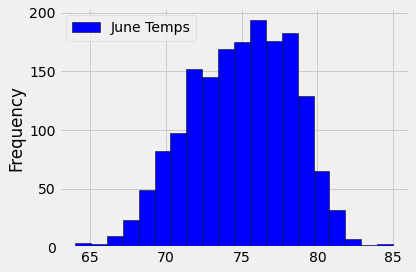

In [17]:
# Histogram plot of June data
june_df.plot.hist(bins=20, color='blue', edgecolor='black')
plt.tight_layout()
plt.savefig('JuneTemps.png')

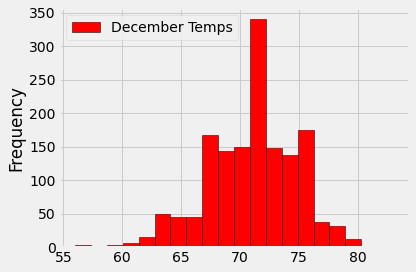

In [18]:
# Histogram plot of December data
december_df.plot.hist(bins=20, color='red', edgecolor='black')
plt.tight_layout()
plt.savefig('DecemberTemps.png')

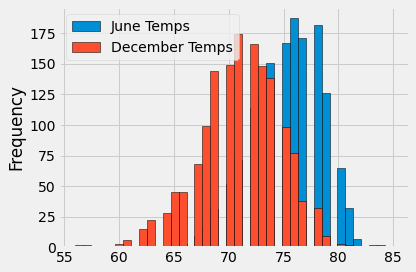

In [19]:
# Histogram plot of June and December together
joint_df = june_df.merge(december_df, left_index=True, right_index=True)
joint_df.plot.hist(bins=40, edgecolor='black')
plt.tight_layout()
plt.savefig('JuneAndDecemberTemps.png')

In [18]:
joint_df

,date_x,June Temps,date_y,December Temps
0,2010-06-01,78.0,2010-12-01,76.0
1,2010-06-02,76.0,2010-12-03,74.0
2,2010-06-03,78.0,2010-12-04,74.0
3,2010-06-04,76.0,2010-12-06,64.0
4,2010-06-05,77.0,2010-12-07,64.0
...,...,...,...,...
1512,2011-06-14,71.0,2016-12-27,71.0
1513,2011-06-15,73.0,2016-12-28,71.0
1514,2011-06-16,72.0,2016-12-29,69.0
1515,2011-06-17,74.0,2016-12-30,65.0


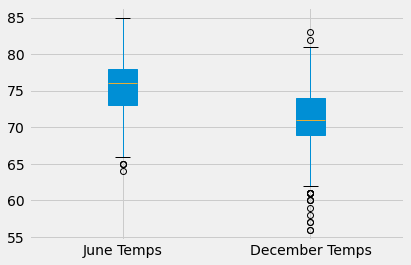

In [20]:
# Making the boxplots for June and December to detect if data is skewed and visualization of outliers
boxplot = joint_df.boxplot(column=['June Temps', 'December Temps'], patch_artist=True)  
plt.savefig('boxplot.png')

# Counting the number of outliers for June and December

## Calculating the Inter Quartile Range (IQR) and Whiskers values for June and December

### IQR = Q3-Q1 (3rd Quartile - 1st Quartile)
### Q1 is the value for the 25% percentile
### Q3 is the value for the 75% percentile
### Upper Bound = Q3 + 1.5*IQR <== Value of the upper Whisker
### Lower Bound = Q1 - 1.5*IQR <== Value of the lower Whisker

## The values of Q1 and Q3 for June and December are printed above (final step of Deliverable 1 (D1) and Deliverable 2 (D2) 

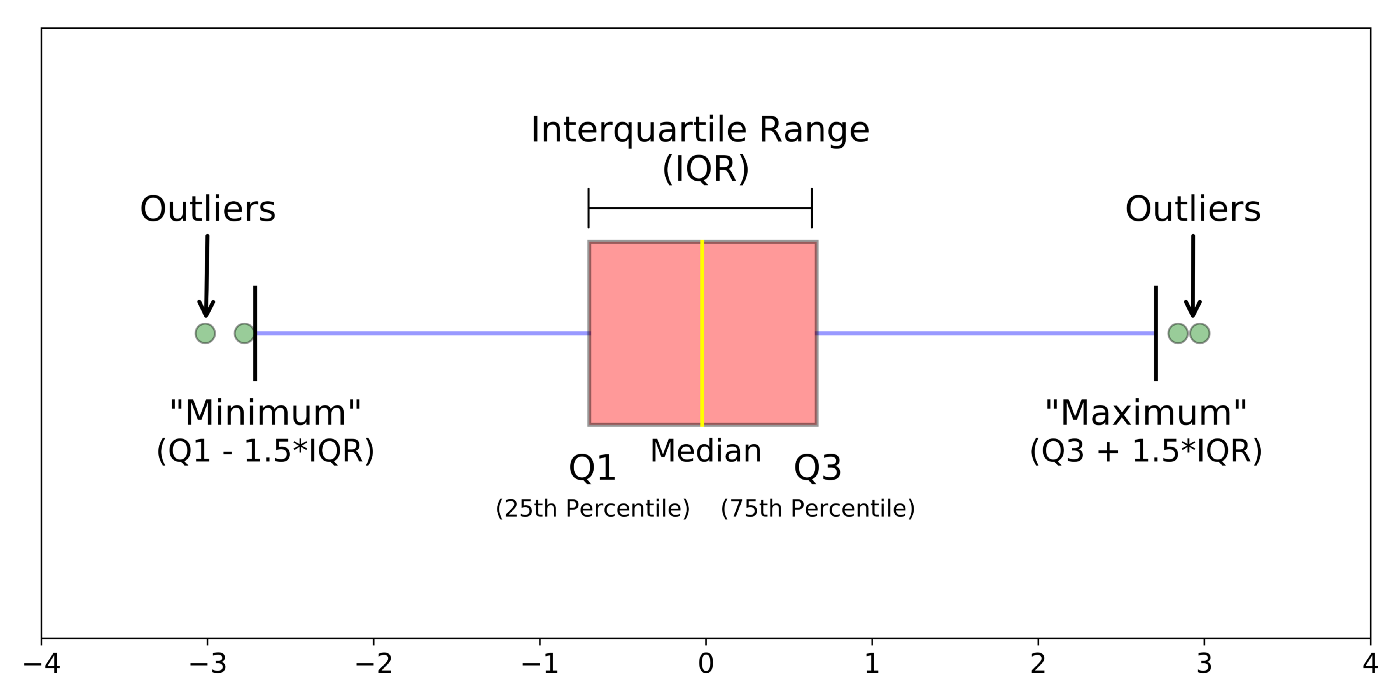

In [32]:
# Counting the number of outliers for June

# Calculating the Inter Quartile Range (IQR) and Whiskers values for June and December

Q1_June = 75
Q3_June = 77
IQR_June = Q3_June - Q1_June # (3rd Quartile - 1st Quartile)

# Value of the upper Whisker for June
Upper_Bound_June = Q3_June + 1.5*IQR_June

# Value of the lower Whisker for June
Lower_Bound_June = Q1_June - 1.5*IQR_June


# For June 
low_outliers_june = june_df[june_df['June Temps'] < Lower_Bound_June]
high_outliers_june = june_df[june_df['June Temps'] > Upper_Bound_June]

In [35]:
low_outliers_june.count()

date          268
June Temps    268
dtype: int64

In [36]:
high_outliers_june.count()

date          44
June Temps    44
dtype: int64

In [38]:
# Counting the number of outliers for December

# Calculating the Inter Quartile Range (IQR) and Whiskers values for December

Q1_December = 69
Q3_December = 74
IQR_December = Q3_December - Q1_December # (3rd Quartile - 1st Quartile)

# Value of the upper Whisker for December
Upper_Bound_December = Q3_December + 1.5*IQR_December

# Value of the lower Whisker for June
Lower_Bound_December = Q1_December - 1.5*IQR_December


# For December 
low_outliers_december = december_df[december_df['December Temps'] < Lower_Bound_December]
high_outliers_december = december_df[december_df['December Temps'] > Upper_Bound_December]

In [39]:
low_outliers_december.count()

date              15
December Temps    15
dtype: int64

In [40]:
high_outliers_december.count()

date              2
December Temps    2
dtype: int64